# 1. Overview
In this notebook , we will practice data visualisation in Python using English Premier League data

# 2. load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Import the data
let's import the csv file we just downloaded

In [2]:
data= pd.read_csv("data.csv")
data.head(3)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,Attacker,65.0,4329,12.0,17.1,264,Americas,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,EU,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.9,134,EU,Czech Republic,0,6,1,1,0


# 4. Transform data 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null object
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null float64
fpl_points      461 non-null int64
region          460 non-null object
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 61.3+ KB


# 5. Start doing some Eploratory data anlysis
# plot

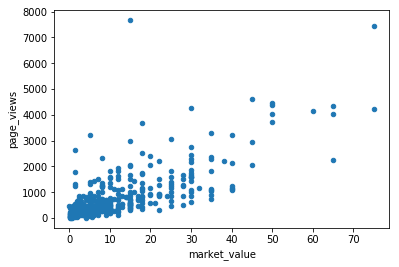

In [4]:
data.plot.scatter(x='market_value', y='page_views')

# matplotlib
#create the same plot using matplotlib

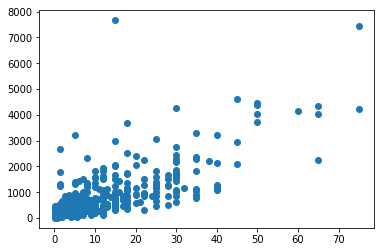

In [5]:
plt.scatter(data.market_value, data.page_views)

Text(0.5, 1.0, 'Fantasy Football Dataset')

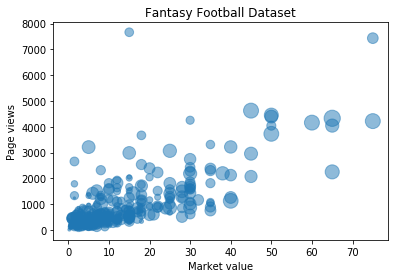

In [6]:
plt.scatter(data.market_value, data.page_views,s=data.fpl_points,alpha=0.5)
plt.xlabel('Market value')
plt.ylabel('Page views')
plt.title('Fantasy Football Dataset')

In [7]:
# Off track - learning how to drop a data without one entry point
data_fixed=data.dropna()
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 460
Data columns (total 17 columns):
name            460 non-null object
club            460 non-null object
age             460 non-null int64
position        460 non-null object
position_cat    460 non-null object
market_value    460 non-null float64
page_views      460 non-null int64
fpl_value       460 non-null float64
fpl_sel         460 non-null float64
fpl_points      460 non-null int64
region          460 non-null object
nationality     460 non-null object
new_foreign     460 non-null int64
age_cat         460 non-null int64
club_id         460 non-null int64
big_club        460 non-null int64
new_signing     460 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 64.7+ KB


# Seaborn
#Matplotlib makes trendline difficult. Let's use trendlines

In [8]:
import seaborn as sns
sns.set()

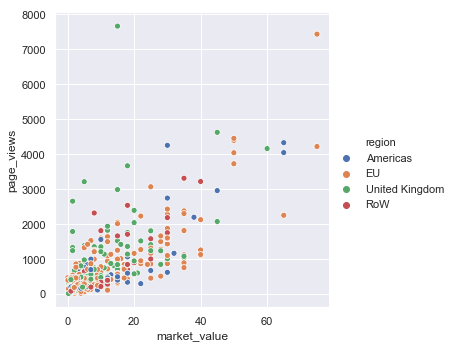

In [9]:
sns.relplot(x="market_value", y="page_views", hue='region', data=data)

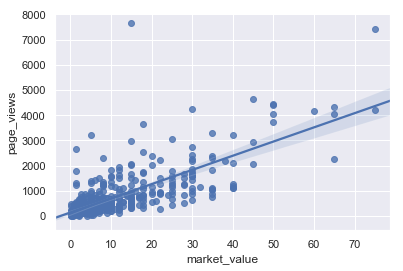

In [10]:
sns.regplot(x='market_value', y='page_views', data=data)

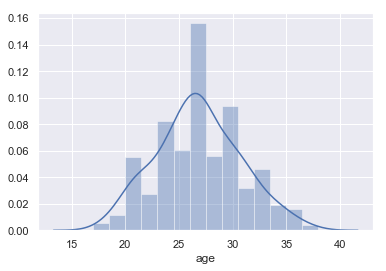

In [11]:
sns.distplot(data.age)

# Bokeh
#switch to bokeh to use interactivity

In [12]:
# get bokeh functions to plot a fegure and read data in columns 
from bokeh.plotting import figure, ColumnDataSource

# get bokek fi=unction for outputs 
from bokeh.io import output_file, show, output_notebook

# get bokeh function to use tyhe HoverTool
from bokeh.models import HoverTool

# display bokeh figures inline (inside jupyter notebook)
output_notebook()

Loading BokehJS ...

In [17]:
# Turn page_views into bubble sizes and use min_size and factor to tweak.
scaling = 1.5
pageview_size = np.sqrt(data.page_views / np.pi)/scaling
min_size = 3
pageview_size = pageview_size.where(
                  pageview_size >= min_size
                  ).fillna(min_size)

# add the pageview_size column to data and adjust source to new dataframe.
data1 = data.assign(pageview_size=pageview_size.values)

# create a ColumnDataSource from our df: source
source=ColumnDataSource(data1)

# create the figure: p
p=figure(tools=['hover'])

# in figure p, display the points as circles

p.circle('market_value', 'fpl_points', source=source, color='blue', size='pageview_size',  alpha=0.5)
p.xaxis.axis_label = 'Market value'
p.yaxis.axis_label = 'Points'

# specify the hover tool
hover=HoverTool(tooltips=[('Name','@name'),('Team','@club'),('Age', '@age'),('position','@position')])

p.add_tools(hover)

show(p)

In [14]:
heatdata = data.pivot_table(index='club', columns='position', values='market_value', aggfunc='mean')
heatdata

position,AM,CB,CF,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
club,,,,,,,,,,,,,
Arsenal,50.00,15.600000,23.000000,21.666667,20.000000,5.000000,12.666667,NaN,37.500000,17.500000,22.0,20.000000,NaN
Bournemouth,NaN,6.000000,7.250000,3.375000,NaN,3.333333,2.500000,NaN,4.625000,3.750000,NaN,8.000000,8.00
Brighton+and+Hove,NaN,3.062500,3.000000,2.750000,NaN,1.875000,1.750000,NaN,1.625000,0.750000,0.5,8.000000,NaN
Burnley,NaN,2.833333,5.666667,4.333333,4.500000,4.000000,1.500000,4.416667,NaN,2.500000,NaN,2.500000,NaN
Chelsea,NaN,21.500000,37.500000,35.000000,33.666667,20.750000,16.000000,NaN,37.525000,30.000000,18.0,30.000000,NaN
Crystal+Palace,5.50,4.333333,17.000000,9.000000,10.000000,2.125000,7.666667,NaN,6.000000,4.000000,NaN,10.500000,NaN
Everton,21.50,7.583333,10.000000,13.666667,9.500000,7.333333,12.000000,NaN,12.500000,6.416667,NaN,9.000000,9.25
Huddersfield,0.75,1.164286,3.625000,1.400000,NaN,0.875000,1.125000,NaN,1.250000,2.000000,NaN,2.812500,NaN
Leicester+City,NaN,3.700000,14.000000,6.000000,9.500000,5.250000,4.250000,6.000000,9.000000,5.000000,NaN,30.000000,NaN


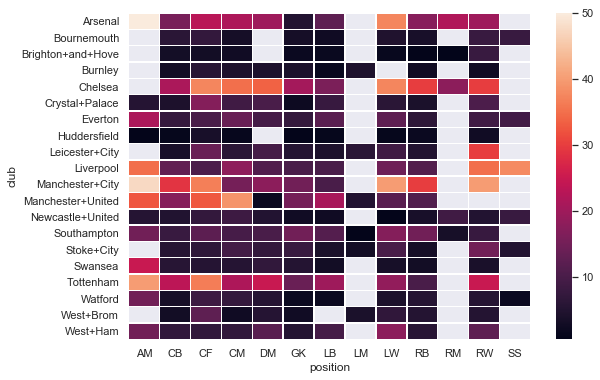

In [15]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(heatdata, annot=False, fmt='d', linewidths=.5, ax=ax)

In [16]:
pageview_size.head()


0    24.747287
1    24.935222
2    14.707456
3    18.399463
4    11.358768
Name: page_views, dtype: float64